# **Sentimen Analisis Review APK DANAPlay Store**



# **Import Library**

In [1]:
#Library Deep Learning
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 tensorflow==2.12.0

In [2]:
import numpy, scipy, gensim, tensorflow
print(f"NumPy: {numpy.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"Gensim: {gensim.__version__}")
print(f"TensorFlow: {tensorflow.__version__}")

NumPy: 1.23.5
SciPy: 1.10.1
Gensim: 4.3.1
TensorFlow: 2.12.0


In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [6]:
app_reviews_df = pd.read_csv('/content/drive/MyDrive/dataset/ulasan_aplikasi.csv')
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [7]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3c274eb3-4de3-41fd-85be-85fb22a55c8b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mengapa sangat sulit mengganti KTP padahal sem...,2,262,2.77.0,2025-03-29 16:56:30,NaN,NaN,2.77.0
1,b933464f-c1d1-435e-8da1-8a65686695f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya tidak menyetujui untuk langganan kembali ...,1,77,2.77.0,2025-04-06 13:41:40,NaN,NaN,2.77.0
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1126,2.77.0,2025-03-27 18:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-11 18:25:35,2.77.0
3,5b1d3731-2ff6-4560-af2e-b82bcf3d1266,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,E-wallet paling lemot. Buka aplikasi aja muter...,1,24,2.77.0,2025-04-06 17:24:51,NaN,NaN,2.77.0
4,afd3c970-5ad2-4996-9186-a27aceeb7d73,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"update beberapa waktu ini, suara notifikasi ga...",3,28,2.77.0,2025-04-05 02:15:07,NaN,NaN,2.77.0


In [8]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              126000 non-null  object
 1   userName              126000 non-null  object
 2   userImage             126000 non-null  object
 3   content               126000 non-null  object
 4   score                 126000 non-null  int64 
 5   thumbsUpCount         126000 non-null  int64 
 6   reviewCreatedVersion  104020 non-null  object
 7   at                    126000 non-null  object
 8   replyContent          96170 non-null   object
 9   repliedAt             96170 non-null   object
 10  appVersion            104020 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.6+ MB


In [9]:
clean_df = app_reviews_df.dropna()

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76862 entries, 2 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              76862 non-null  object
 1   userName              76862 non-null  object
 2   userImage             76862 non-null  object
 3   content               76862 non-null  object
 4   score                 76862 non-null  int64 
 5   thumbsUpCount         76862 non-null  int64 
 6   reviewCreatedVersion  76862 non-null  object
 7   at                    76862 non-null  object
 8   replyContent          76862 non-null  object
 9   repliedAt             76862 non-null  object
 10  appVersion            76862 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.0+ MB


In [11]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

##Preprocessing

In [12]:

# 1. Cleaning Text(Membersihkan dan mengganti beberapa karakter pada dataset)
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

# 2. Case Folding(Merubah semua karakter menjadi huruf kecil)
def casefoldingText(text):
    text = text.lower()
    return text

# 3. Tokenizing(Membagi teks ke daftar kata(token))
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# 4. Filtering(Menghapus kata-kata berhenti)
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# 5. Stemming(Mengubah kata berimbuhan menjadi kata dasar)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# 6. toSentence(Menggabungkan daftar kata menjadi sebuah kalimat)
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [13]:
# Membantu mengartikan kata kata slang atau bahasa gaul ke bahasa formal
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [14]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1126,2.77.0,2025-03-27 18:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-11 18:25:35,2.77.0
7,58e42850-13a9-4d31-80ad-77fc266b1f78,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,udah habis pulsa banyak buat telpon customer s...,1,41,2.77.0,2025-04-04 22:37:51,"Hi kak, maaf ya buat kamu ga tenang. Jgn khawa...",2025-04-08 22:47:44,2.77.0
12,9ace9065-c0c1-40f6-89c4-11dfaedb9926,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong aplikasinya di perkuat lagi keaman...,1,743,2.76.0,2025-03-23 14:20:12,"Hi Kak, maaf udah bikin kamu ga tenang. DANA a...",2025-03-30 16:43:12,2.76.0
17,a43400c5-ad3d-447e-b8d2-8d354a3362fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bisa ngga sih dana upgrade lagi, bila pembayar...",3,290,2.72.0,2025-02-01 05:26:52,"Hi kak, kami paham apa yg kamu rasakan. DANA h...",2025-03-11 07:25:52,2.72.0
20,833569be-6ca8-4017-a773-169626a0e296,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tutup akun aja kayak nagih hutang, sulit, yg a...",1,904,2.74.0,2025-02-14 22:21:28,"Hi Kak, kami sedih lho kalau kamu ngga gunain ...",2025-02-24 06:48:21,2.74.0
...,...,...,...,...,...,...,...,...,...,...,...
125992,52393551-cf9e-4280-9ab2-d15feb017674,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap. Klo bisa tingkatkan lagi dengan bisa b...,5,0,2.8.0,2024-05-06 03:20:22,"Makasih buat review nya, jangan lupa ajak teme...",2024-05-06 03:22:22,2.8.0
125993,3067c14c-1840-4a52-8219-11b8ca712e54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin di update makin kacau,masa gw ga bisa ma...",1,0,2.35.0,2023-06-01 13:42:34,"Hi Kak, jgn khawatir ya kak, buat keluhan km, ...",2022-06-20 03:04:39,2.35.0
125996,beb5fe14-ca82-4249-a7b0-aba8f39de47b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin kesini makin jelek aplikasinya..suka lag...,1,1,2.60.1,2024-07-22 06:22:17,"Hi Kak Pethor, terkait keluhan saat mengakses ...",2024-07-22 06:29:28,2.60.1
125998,c3990075-3d4c-47d7-bd0b-a51780037766,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Awal nya bagus,TPI setelah diPakai kelamaan sa...",1,0,2.27.0,2022-12-25 05:16:20,"Hai Pengguna DANA, untuk keluhan transaksi, sa...",2022-12-25 05:18:22,2.27.0


In [15]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [16]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1126,2.77.0,2025-03-27 18:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-11 18:25:35,2.77.0,Emang aplikasi BUSUKSaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,"[emang, aplikasi, busuksaya, transaksi, sudah,...","[emang, aplikasi, busuksaya, transaksi, berhas...",emang aplikasi busuksaya transaksi berhasil bu...
7,58e42850-13a9-4d31-80ad-77fc266b1f78,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,udah habis pulsa banyak buat telpon customer s...,1,41,2.77.0,2025-04-04 22:37:51,"Hi kak, maaf ya buat kamu ga tenang. Jgn khawa...",2025-04-08 22:47:44,2.77.0,udah habis pulsa banyak buat telpon customer s...,udah habis pulsa banyak buat telpon customer s...,sudah habis pulsa banyak buat telpon customer ...,"[sudah, habis, pulsa, banyak, buat, telpon, cu...","[habis, pulsa, telpon, customer, service, dana...",habis pulsa telpon customer service danatetep ...
12,9ace9065-c0c1-40f6-89c4-11dfaedb9926,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong aplikasinya di perkuat lagi keaman...,1,743,2.76.0,2025-03-23 14:20:12,"Hi Kak, maaf udah bikin kamu ga tenang. DANA a...",2025-03-30 16:43:12,2.76.0,Tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,"[tolong, dong, aplikasinya, di, perkuat, lagi,...","[tolong, aplikasinya, perkuat, keamanan, rugi,...",tolong aplikasinya perkuat keamanan rugi sejut...
17,a43400c5-ad3d-447e-b8d2-8d354a3362fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bisa ngga sih dana upgrade lagi, bila pembayar...",3,290,2.72.0,2025-02-01 05:26:52,"Hi kak, kami paham apa yg kamu rasakan. DANA h...",2025-03-11 07:25:52,2.72.0,Bisa ngga sih dana upgrade lagi bila pembayara...,bisa ngga sih dana upgrade lagi bila pembayara...,bisa tidak sih dana upgrade lagi bila pembayar...,"[bisa, tidak, sih, dana, upgrade, lagi, bila, ...","[dana, upgrade, pembayaran, otomatis, langgana...",dana upgrade pembayaran otomatis langganan dik...
20,833569be-6ca8-4017-a773-169626a0e296,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tutup akun aja kayak nagih hutang, sulit, yg a...",1,904,2.74.0,2025-02-14 22:21:28,"Hi Kak, kami sedih lho kalau kamu ngga gunain ...",2025-02-24 06:48:21,2.74.0,Tutup akun aja kayak nagih hutang sulit yg ada...,tutup akun aja kayak nagih hutang sulit yg ada...,tutup akun saja kayak nagih hutang sulit yang ...,"[tutup, akun, saja, kayak, nagih, hutang, suli...","[tutup, akun, kayak, nagih, hutang, sulit, ken...",tutup akun kayak nagih hutang sulit kendala ke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125992,52393551-cf9e-4280-9ab2-d15feb017674,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap. Klo bisa tingkatkan lagi dengan bisa b...,5,0,2.8.0,2024-05-06 03:20:22,"Makasih buat review nya, jangan lupa ajak teme...",2024-05-06 03:22:22,2.8.0,Mantap Klo bisa tingkatkan lagi dengan bisa be...,mantap klo bisa tingkatkan lagi dengan bisa be...,mantap kalau bisa tingkatkan lagi dengan bisa ...,"[mantap, kalau, bisa, tingkatkan, lagi, dengan...","[mantap, tingkatkan, beli, saldo, gojek, maxim]",mantap tingkatkan beli saldo gojek maxim
125993,3067c14c-1840-4a52-8219-11b8ca712e54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin di update makin kacau,masa gw ga bisa ma...",1,0,2.35.0,2023-06-01 13:42:34,"Hi Kak, jgn khawatir ya kak, buat keluhan km, ...",2022-06-20 03:04:39,2.35.0,Makin di update makin kac

##Pelabelan

In [17]:
import requests
import csv
from io import StringIO

lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


In [18]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # jika tidak keduanya maka polaritas adalah netral

    return score, polarity

In [19]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    39949
negative    32562
neutral      4351
Name: count, dtype: int64


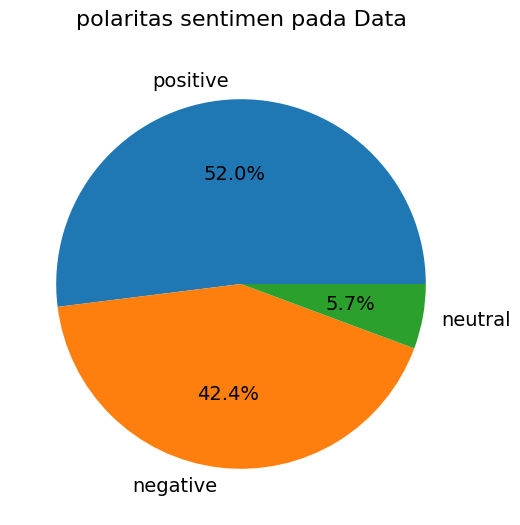

In [20]:
# Memenampilkan plot hasil polarisasi kata.
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('polaritas sentimen pada Data', fontsize=16, pad=20)
plt.show()

In [21]:
# Mengatur opsi tampilan Pandas untuk polaritas positif
pd.set_option('display.max_colwidth', 100000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [22]:
# Mengatur opsi tampilan Pandas untuk polaritas negatif
pd.set_option('display.max_colwidth', 100000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [23]:
# Mengatur opsi tampilan Pandas untuk polaritas netral
pd.set_option('display.max_colwidth', 100000)
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

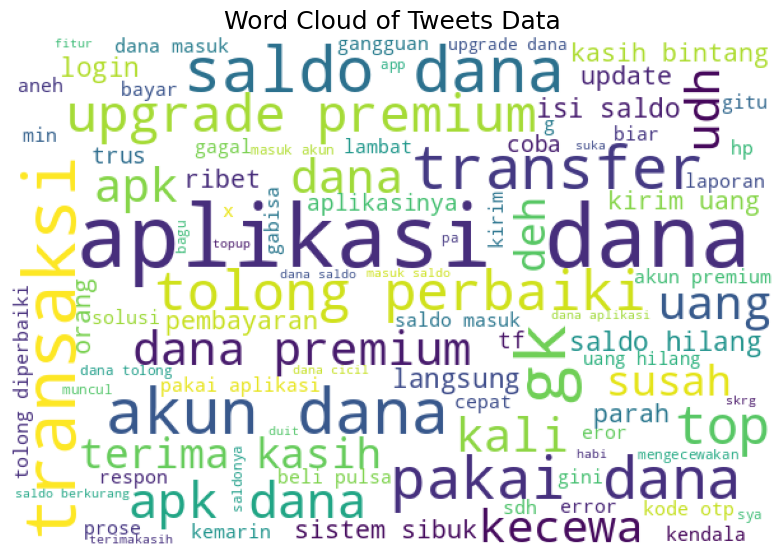

In [24]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ' '.join(
    ' '.join(tweet) if isinstance(tweet, list) else tweet
    for tweet in clean_df['text_stopword']
)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

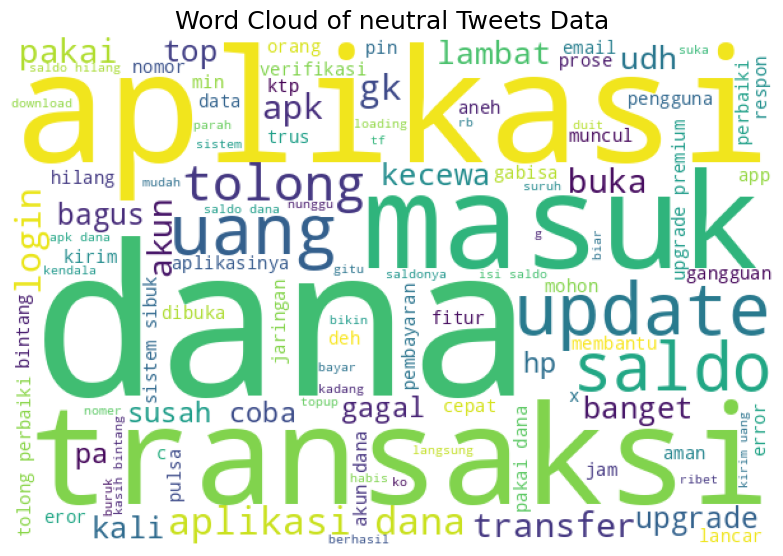

In [25]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ' '.join(
    ' '.join(tweet) if isinstance(tweet, list) else tweet
    for tweet in neutral_tweets['text_stopword']
)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

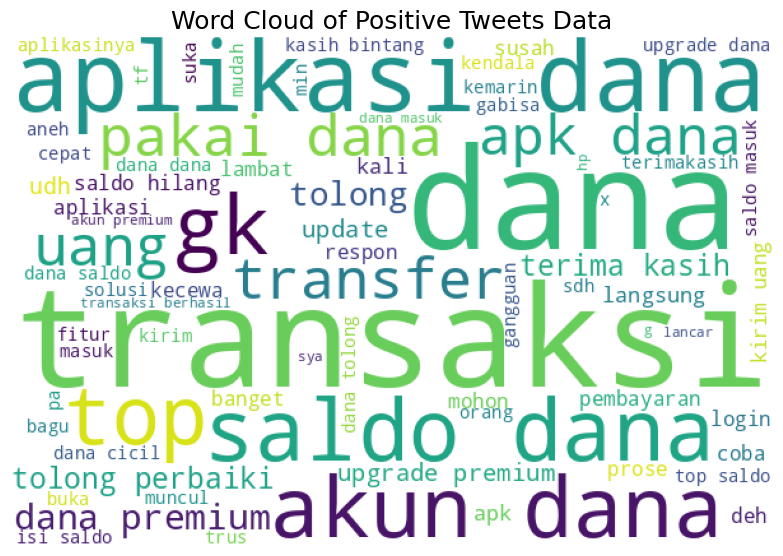

In [26]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ' '.join(
    ' '.join(tweet) if isinstance(tweet, list) else tweet
    for tweet in positive_tweets['text_stopword']
)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

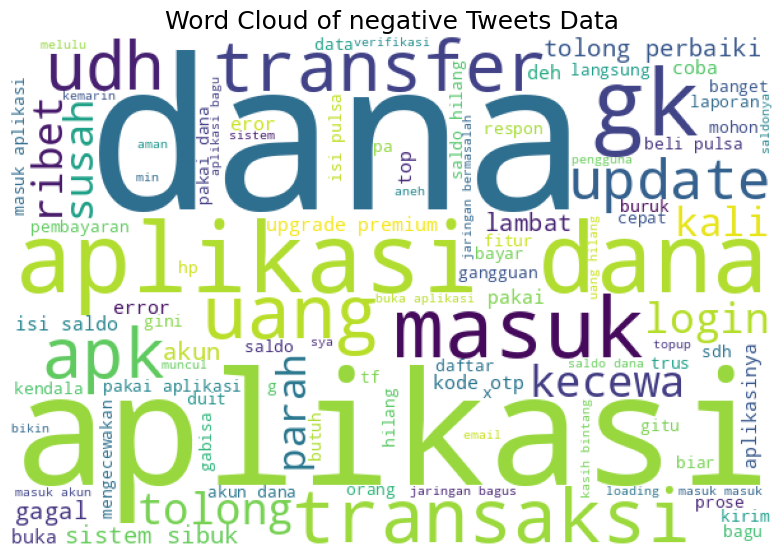

In [27]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ' '.join(
    ' '.join(tweet) if isinstance(tweet, list) else tweet
    for tweet in negative_tweets['text_stopword']
)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

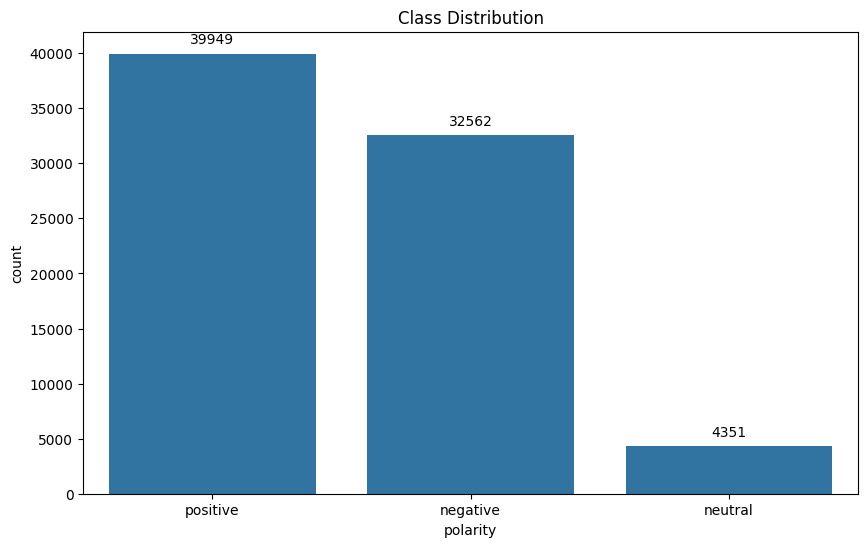

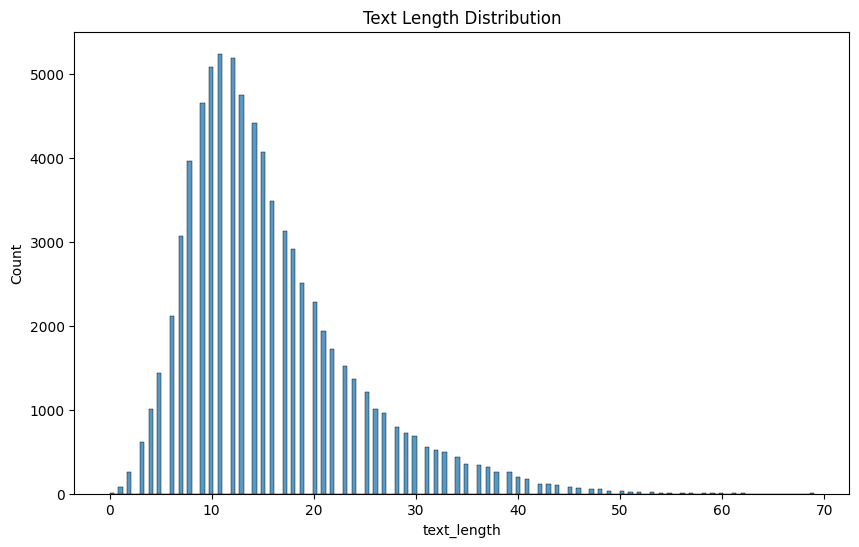

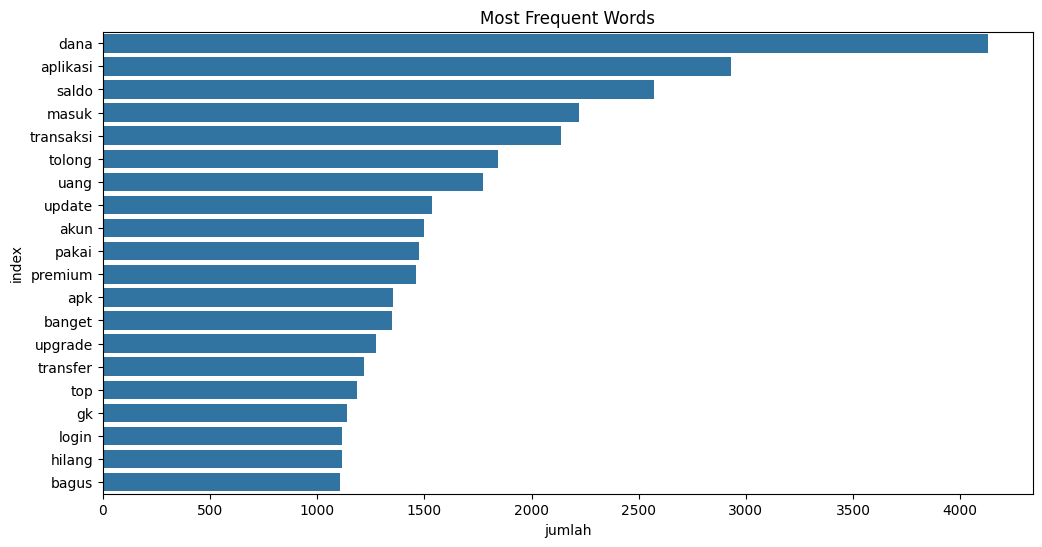

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [30]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Emang aplikasi BUSUK.Saya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil. Tapi saldo gak masuk,Alias uang saya ilang begitu aja.. Emang gak bnyak sih.. Cuma kecewa aja.Udah 3 kali ini lho. Clear chace sudah,update udah,jaringan stabil.Tetep aja uang hilang.. Baru ini transaksi terjadi tapi uang tidak terisi. Hati hati buat pengguna DANA. Menghubungi DIANA dan email juga gak ada respon. Jangan di download deh. Rugi..!!",1,1126,2.77.0,2025-03-27 18:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkait keluhan saldo yg belum diterima agar kami bantu lebih lanjut, Kakak dapat menghubungi DIANA pd menu ""Me/Saya"" ya Kak. Kami pasti akan bantu keluhan kamu sebaik mungkin. Thanks -NA-",2025-03-11 18:25:35,2.77.0,Emang aplikasi BUSUKSaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil Tapi saldo gak masukAlias uang saya ilang begitu aja Emang gak bnyak sih Cuma kecewa ajaUdah kali ini lho Clear chace sudahupdate udahjaringan stabilTetep aja uang hilang Baru ini transaksi terjadi tapi uang tidak terisi Hati hati buat pengguna DANA Menghubungi DIANA dan email juga gak ada respon Jangan di download deh Rugi,emang aplikasi busuksaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil tapi saldo gak masukalias uang saya ilang begitu aja emang gak bnyak sih cuma kecewa ajaudah kali ini lho clear chace sudahupdate udahjaringan stabiltetep aja uang hilang baru ini transaksi terjadi tapi uang tidak terisi hati hati buat pengguna dana menghubungi diana dan email juga gak ada respon jangan di download deh rugi,emang aplikasi busuksaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil tapi saldo gak masukalias uang saya hilang begitu saja emang gak bnyak sih cuma kecewa ajaudah kali ini lho clear chace sudahupdate udahjaringan stabiltetep saja uang hilang baru ini transaksi terjadi tapi uang tidak terisi hati hati buat pengguna dana menghubungi diana dan email juga gak ada respon jangan di download deh rugi,"[emang, aplikasi, busuksaya, transaksi, sudah, terjadi, dan, berhasil, dan, ada, bukti, transaksi, berhasil, tapi, saldo, gak, masukalias, uang, saya, hilang, begitu, saja, emang, gak, bnyak, sih, cuma, kecewa, ajaudah, kali, ini, lho, clear, chace, sudahupdate, udahjaringan, stabiltetep, saja, uang, hilang, baru, ini, transaksi, terjadi, tapi, uang, tidak, terisi, hati, hati, buat, pengguna, dana, menghubungi, diana, dan, email, juga, gak, ada, respon, jangan, di, download, deh, rugi]","[emang, aplikasi, busuksaya, transaksi, berhasil, bukti, transaksi, berhasil, saldo, masukalias, uang, hilang, emang, bnyak, kecewa, ajaudah, kali, lho, clear, chace, sudahupdate, udahjaringan, stabiltetep, uang, hilang, transaksi, uang, terisi, hati, hati, pengguna, dana, menghubungi, diana, email, respon, download, deh, rugi]",emang aplikasi busuksaya transaksi berhasil bukti transaksi berhasil saldo masukalias uang hilang emang bnyak kecewa ajaudah kali lho clear chace sudahupdate udahjaringan stabiltetep uang hilang transaksi uang terisi hati hati pengguna dana menghubungi diana email respon download deh rugi,14,positive,39
7,58e42850-13a9-4d31-80ad-77fc266b1f78,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"udah habis pulsa banyak buat telpon customer service dana,tetep aja gak bisa login.. alasan akun masih dilindungi..udah kirim email info KTP juga video selfie... yang ada hanya balasan no antrian,padahal udah jalan 3 tahun aku gk bisa login... tolong di proses dan d

In [31]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

params = {
    'tfidf__max_features': [500, 1000, 2000],
    'tfidf__min_df': [1, 3, 5],
    'tfidf__max_df': [0.7, 0.9, 1.0],
    'tfidf__ngram_range': [(1,1), (1,2)]
}

grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'tfidf__max_df': 0.7, 'tfidf__max_features': 2000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best score: 0.7744400651818172


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=2000,
    min_df=1,
    max_df=0.7,
    ngram_range=(1, 2)
)

X_tfidf = tfidf.fit_transform(X)
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("Shape:", X_tfidf.shape)
print("Contoh fitur:", tfidf.get_feature_names_out()[:10])

Shape: (76862, 2000)
Contoh fitur: ['accord' 'account' 'adain' 'adakan' 'admin' 'admin dana' 'adminnya'
 'aduh' 'agen' 'agustus']


In [34]:
features_df

,accord,account,adain,adakan,admin,admin dana,adminnya,aduh,agen,agustus,...,wallet,watching,web,whatsapp,wifi,win,yaaa,yah,yng,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Pemodelan**

In [36]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.77838312543707
Naive Bayes - accuracy_test: 0.770376634358941


In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9995608970710208
Random Forest - accuracy_test: 0.8190984193065765


In [38]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9123257818471596
Logistic Regression - accuracy_test: 0.9030117738892864


In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9995771601424646
Decision Tree - accuracy_test: 0.7182072464710857


In [40]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.770377
1        Random Forest       0.819098
2  Logistic Regression       0.903012
3        Decision Tree       0.718207


In [41]:
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

print(accuracy_test_sorted)


                 Model  Accuracy Test
2  Logistic Regression       0.903012
1        Random Forest       0.819098
0          Naive Bayes       0.770377
3        Decision Tree       0.718207


In [42]:
kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

X_kalimat_baru = tfidf.transform([kalimat_baru_final])

prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIVE.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: update
Sentimen kalimat baru adalah NETRAL.


#Kriteria Optional

Menggunakan Algoritma Deep Learning

#Import Library

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Skema Pelatihan 1: LSTM dengan Embedding pembagian data 80/20

In [44]:
def deep_learning_scheme1():
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])
    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

model1, history1, train_acc1, test_acc1 = deep_learning_scheme1()
print(f"Skema 1 - Akurasi Training: {train_acc1:.4f}, Akurasi Testing: {test_acc1:.4f}")

Epoch 1/10
481/481 [==============================] - 907s 2s/step - loss: 0.3917 - accuracy: 0.8479 - val_loss: 0.2426 - val_accuracy: 0.9067
Epoch 2/10
481/481 [==============================] - 838s 2s/step - loss: 0.2082 - accuracy: 0.9232 - val_loss: 0.2276 - val_accuracy: 0.9192
Epoch 3/10
481/481 [==============================] - 859s 2s/step - loss: 0.1727 - accuracy: 0.9359 - val_loss: 0.2055 - val_accuracy: 0.9240
Epoch 4/10
481/481 [==============================] - 873s 2s/step - loss: 0.1489 - accuracy: 0.9453 - val_loss: 0.2130 - val_accuracy: 0.9263
Epoch 5/10
481/481 [==============================] - 875s 2s/step - loss: 0.1299 - accuracy: 0.9535 - val_loss: 0.2093 - val_accuracy: 0.9260
Epoch 6/10
481/481 [==============================] - 865s 2s/step - loss: 0.1135 - accuracy: 0.9601 - val_loss: 0.2259 - val_accuracy: 0.9222
Epoch 7/10
481/481 [==============================] - 872s 2s/step - loss: 0.1012 - accuracy: 0.9651 - val_loss: 0.2311 - val_accuracy: 0.9253

Skema Pelatihan 2: CNN dengan Word Embedding pembagian data 80/20

In [45]:
from gensim.models import Word2Vec

def deep_learning_scheme2():
    sentences = [text.split() for text in clean_df['text_akhir']]
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])

    embedding_matrix = np.zeros((5000, 100))
    for word, i in tokenizer.word_index.items():
        if i < 5000:
            if word in w2v_model.wv:
                embedding_matrix[i] = w2v_model.wv[word]

    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Embedding(input_dim=5000,
                       output_dim=100,
                       input_length=200,
                       weights=[embedding_matrix],
                       trainable=False))
    model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=15,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

model2, history2, train_acc2, test_acc2 = deep_learning_scheme2()
print(f"Skema 2 - Akurasi Training: {train_acc2:.4f}, Akurasi Testing: {test_acc2:.4f}")

Epoch 1/15
481/481 [==============================] - 114s 234ms/step - loss: 0.6790 - accuracy: 0.7169 - val_loss: 0.5501 - val_accuracy: 0.7773
Epoch 2/15
481/481 [==============================] - 110s 228ms/step - loss: 0.5569 - accuracy: 0.7848 - val_loss: 0.5136 - val_accuracy: 0.7987
Epoch 3/15
481/481 [==============================] - 110s 228ms/step - loss: 0.5129 - accuracy: 0.8051 - val_loss: 0.5170 - val_accuracy: 0.7986
Epoch 4/15
481/481 [==============================] - 106s 221ms/step - loss: 0.4786 - accuracy: 0.8195 - val_loss: 0.4933 - val_accuracy: 0.8093
Epoch 5/15
481/481 [==============================] - 106s 220ms/step - loss: 0.4492 - accuracy: 0.8335 - val_loss: 0.4944 - val_accuracy: 0.8125
Epoch 6/15
481/481 [==============================] - 107s 223ms/step - loss: 0.4306 - accuracy: 0.8406 - val_loss: 0.5033 - val_accuracy: 0.8087
Epoch 7/15
481/481 [==============================] - 108s 224ms/step - loss: 0.4087 - accuracy: 0.8501 - val_loss: 0.4980 -

Skema 3: Transformer (BERT) + 80/20 Split:

In [46]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

def deep_learning_scheme3():

    X_tfidf = tfidf.transform(clean_df['text_akhir'])

    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y_encoded, test_size=0.3, random_state=42)

    inputs = tf.keras.Input(shape=(X_tfidf.shape[1],))

    attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(inputs[:, tf.newaxis, :], inputs[:, tf.newaxis, :])
    attention_output = tf.squeeze(attention_output, axis=1)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    x = Dense(256, activation='relu')(attention_output)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(3)(x)
    outputs = tf.keras.layers.Activation('softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_test, y_test),
                        verbose=1)

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

model3, history3, train_acc3, test_acc3 = deep_learning_scheme3()
print(f"Skema 3 - Akurasi Training: {train_acc3:.4f}, Akurasi Testing: {test_acc3:.4f}")

Epoch 1/20
841/841 [==============================] - 125s 143ms/step - loss: 0.4814 - accuracy: 0.8179 - val_loss: 0.3276 - val_accuracy: 0.8791
Epoch 2/20
841/841 [==============================] - 98s 116ms/step - loss: 0.3152 - accuracy: 0.8888 - val_loss: 0.2974 - val_accuracy: 0.8925
Epoch 3/20
841/841 [==============================] - 91s 108ms/step - loss: 0.2779 - accuracy: 0.9013 - val_loss: 0.2867 - val_accuracy: 0.8973
Epoch 4/20
841/841 [==============================] - 94s 112ms/step - loss: 0.2579 - accuracy: 0.9087 - val_loss: 0.2778 - val_accuracy: 0.9040
Epoch 5/20
841/841 [==============================] - 96s 114ms/step - loss: 0.2383 - accuracy: 0.9169 - val_loss: 0.2798 - val_accuracy: 0.9051
Epoch 6/20
841/841 [==============================] - 94s 111ms/step - loss: 0.2215 - accuracy: 0.9220 - val_loss: 0.2785 - val_accuracy: 0.9049
Epoch 7/20
841/841 [==============================] - 94s 112ms/step - loss: 0.2091 - accuracy: 0.9265 - val_loss: 0.2815 - val_a

#Evaluasi

Membandingkan hasil ketiga skema

                       Skema  Training Accuracy  Testing Accuracy Data Split  \
0      LSTM dengan Embedding           0.973133          0.928576      80/20   
1        CNN dengan Word2Vec           0.889183          0.801860      80/20   
2  Transformer dengan TF-IDF           0.974481          0.903942      70/30   

  Feature Extraction  
0             TF-IDF  
1           Word2Vec  
2             TF-IDF  


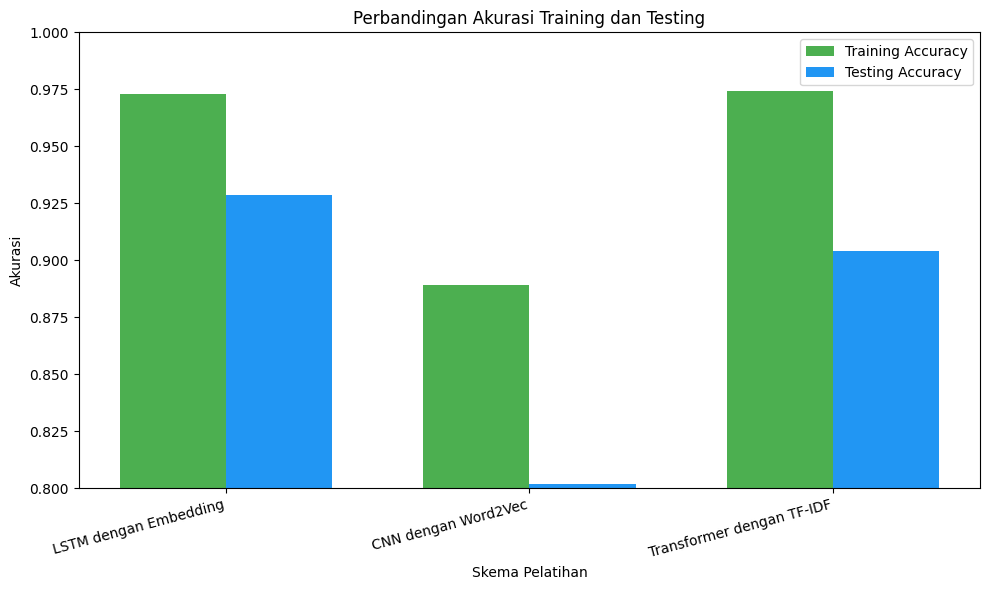

In [47]:
results = {
    'Skema': ['LSTM dengan Embedding', 'CNN dengan Word2Vec', 'Transformer dengan TF-IDF'],
    'Training Accuracy': [train_acc1, train_acc2, train_acc3],
    'Testing Accuracy': [test_acc1, test_acc2, test_acc3],
    'Data Split': ['80/20', '80/20', '70/30'],
    'Feature Extraction': ['TF-IDF', 'Word2Vec', 'TF-IDF']
}

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
x = np.arange(3)
width = 0.35

plt.bar(x - width/2, results_df['Training Accuracy'], width, label='Training Accuracy', color='#4CAF50')
plt.bar(x + width/2, results_df['Testing Accuracy'], width, label='Testing Accuracy', color='#2196F3')


plt.xlabel('Skema Pelatihan')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Training dan Testing')
plt.xticks(x, results_df['Skema'], rotation=15, ha='right')
plt.legend()
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

#Simpan model dengan akurasi terbaik untuk inference

In [48]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

def deep_learning_scheme1_save():
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])
    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc, tokenizer, le

model1, history1, train_acc1, test_acc1, tokenizer, le = deep_learning_scheme1_save()

model1.save('lstm_model.h5')
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

Epoch 1/10
481/481 [==============================] - 934s 2s/step - loss: 0.3839 - accuracy: 0.8501 - val_loss: 0.2489 - val_accuracy: 0.9078
Epoch 2/10
481/481 [==============================] - 896s 2s/step - loss: 0.2091 - accuracy: 0.9228 - val_loss: 0.2236 - val_accuracy: 0.9189
Epoch 3/10
481/481 [==============================] - 888s 2s/step - loss: 0.1706 - accuracy: 0.9367 - val_loss: 0.1996 - val_accuracy: 0.9284
Epoch 4/10
481/481 [==============================] - 880s 2s/step - loss: 0.1489 - accuracy: 0.9452 - val_loss: 0.2081 - val_accuracy: 0.9269
Epoch 5/10
481/481 [==============================] - 884s 2s/step - loss: 0.1335 - accuracy: 0.9514 - val_loss: 0.2131 - val_accuracy: 0.9274
Epoch 6/10
481/481 [==============================] - 893s 2s/step - loss: 0.1155 - accuracy: 0.9581 - val_loss: 0.2192 - val_accuracy: 0.9221
Epoch 7/10
481/481 [==============================] - 905s 2s/step - loss: 0.1044 - accuracy: 0.9631 - val_loss: 0.2430 - val_accuracy: 0.9224

In [49]:
!pip freeze > requirements.txt

from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>